Цель работы – изучить на примере выбранной молекулы преимущества и недостатки теории функционала плотности и метода Хартри-Фока. 
Задачи: 
1. Оптимизировать геометрию молекулы на уровне HF/6-31G. 
2. Оптимизировать геометрию молекулы на уровне B3LYP/6-31G. 
3. Сравнить рассчитанные геометрические параметры с экспериментальными. 
4. Проанализировать время и результаты расчёта, сделать выводы. В качестве экспериментальной геометрии предпочтение отдаётся полученной методом газовой электронографии (GED) или микроволновой спектроскопии (MWS).

Для сравнительной характеристики двух методов была взята русскоязычная статья DOI: https://doi.org/10.1016/0301-0104(76)80126-7. 
В данной статье присутствуют данные о микроволновой спектроскопии 1,2,3-тиодиазола.

По результатам файлов расчета были получены декартовы координаты оптимизированной структуры исследуемой молекулы уротропина.

Формулы, используемые в расчете:

- Межатомное растояние
$$r^2 = \Delta X^2+\Delta Y^2+\Delta Z^2$$

- Валентный угол
$$\phi(ABC) = acos(\frac{AB+BC-AC}{2*AB*BC})(\frac{180}{\pi})$$
- Двугранный угол
$$\phi(ABCD) = acos(\frac{\vec n(ABC)\cdot \vec n(BCD)}{\sqrt{\vec n(ABC)^2}\cdot \sqrt{\vec n(BCD)^2}})(\frac{180}{\pi})$$
где n(i) - нормали к плоскостям

Индексация атомов представлена на изображении:


In [19]:
import orca_parser
import matplotlib.pyplot as plt
from orca_parser import *
import ase, sys
import pandas as pd
print("1,2,3-thiodiazole HF 6-31G(d)")
Optimization = ORCAParse("/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab1/HF/123thiadiazole_HF_631G.out")
print("ORCA exited normally:", Optimization.valid)
print("Job took:", Optimization.seconds(), "seconds")

Optimization.parse_coords()
print("Atoms:", Optimization.atoms)
print("Final coordinates:")
pd.set_option('display.float_format', '{:.4e}'.format)
df = pd.DataFrame(Optimization.coords[-1])
df.columns = ['x', 'y', 'z']
df.index = ['H', 'N', 'C', 'S', 'C', 'N', 'H']
print(df)
Optimization.parse_energies()
print("Energy at convergence:")
print(Optimization.energies[-1], "Ha")
print(float(Optimization.energies[-1]) / 2.294e+17, "J")
Optimization.parse_free_energy()

1,2,3-thiodiazole HF 6-31G(d)
ORCA exited normally: True
Job took: 31.301 seconds
Atoms: ['H', 'N', 'C', 'S', 'C', 'N', 'H']
Final coordinates:
            x          y           z
H -6.0425e+00 2.4435e+00 -3.6226e-01
N -4.8055e+00 2.0625e+00  2.8674e+00
C -5.6568e+00 2.1696e+00  5.9711e-01
S -5.3238e+00 3.2812e+00  1.8386e+00
C -5.3492e+00 9.4290e-01  1.0530e+00
N -4.8722e+00 9.3628e-01  2.3414e+00
H -5.4371e+00 1.3750e-02  5.3033e-01
Energy at convergence:
-583.240369476001 Ha
-2.5424601982388884e-15 J


In [21]:
print("1,2,3-thiodiazole B3LYP 6-31G(d)")
Optimization = ORCAParse("/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab1/b3lyp/123thiadiazole_b3lyp_631G/123thiadiazole_b3lyp_631G.out")
print("ORCA exited normally:", Optimization.valid)
print("Job took:", Optimization.seconds(), "seconds")

Optimization.parse_coords()
print("Atoms:", Optimization.atoms)
print("Final coordinates:")
pd.set_option('display.float_format', '{:.4e}'.format)
df = pd.DataFrame(Optimization.coords[-1])
df.columns = ['x', 'y', 'z']
df.index = ['H', 'N', 'C', 'S', 'C', 'N', 'H']
print(df)
Optimization.parse_energies()
print("Energy at convergence:")
print(Optimization.energies[-1], "Ha")
print(float(Optimization.energies[-1]) / 2.294e+17, "J")
Optimization.parse_free_energy()

1,2,3-thiodiazole B3LYP 6-31G(d)
ORCA exited normally: True
Job took: 190.932 seconds
Atoms: ['H', 'N', 'C', 'S', 'C', 'N', 'H']
Final coordinates:
            x          y           z
H -5.8281e+00 3.5841e+00 -1.1264e+00
N -4.8050e+00 3.0879e+00  2.2331e+00
C -5.5146e+00 3.2910e+00 -1.3355e-01
S -5.2329e+00 4.3973e+00  1.1325e+00
C -5.2780e+00 2.0207e+00  3.2415e-01
N -4.8886e+00 1.9670e+00  1.6393e+00
H -5.3695e+00 1.1003e+00 -2.3881e-01
Energy at convergence:
-584.885366904638 Ha
-2.5496310675877854e-15 J


In [23]:
bond_lengths = [
    [1.6917, 1.667, 1.763],
    [1.2897, 1.245, 1.271],
    [1.3662, 1.347, 1.373],
    [1.3686, 1.344, 1.371],
    [1.6888, 1.669, 1.705],
    [1.0779, 1.070, 1.083],
    [1.0805, 1.070, 1.082]
]
pd.set_option('display.float_format', '{:.5}'.format)
df = pd.DataFrame(bond_lengths)
df.columns = ['MWS', 'HF', 'DFT']
df.index = ['S1-N2', 'N2-N3', 'N3-C4', 'C4-C5', 'C5-S1', 'C4-H4', 'C5-H5']
print(df)

         MWS    HF   DFT
S1-N2 1.6917 1.667 1.763
N2-N3 1.2897 1.245 1.271
N3-C4 1.3662 1.347 1.373
C4-C5 1.3686 1.344 1.371
C5-S1 1.6888 1.669 1.705
C4-H4 1.0779  1.07 1.083
C5-H5 1.0805  1.07 1.082


In [25]:
bond_angles = [[92.910, 91.914, 91.245],
    [111.21, 112.438, 110.319],
    [113.95, 114.237, 115.580],
    [114.15, 113.695, 113.896],
    [107.79, 107.715, 108.959],
    [119.23, 118.853, 119.268],
    [129.36, 128.340, 129.420]
]
pd.set_option('display.float_format', '{:.5}'.format)
df = pd.DataFrame(bond_angles)
df.columns = ['MWS', 'HF', 'DFT']
df.index = ['C5-S1-N2', 'S1-N2-N3', 'N2-N3-C4', 'N3-C4-C5', 'C4-C5-S1', 'N3-C4-H4', 'C4-C5-H5']
print(df)

            MWS     HF    DFT
C5-S1-N2  92.91 91.914 91.245
S1-N2-N3 111.21 112.44 110.32
N2-N3-C4 113.95 114.24 115.58
N3-C4-C5 114.15 113.69  113.9
C4-C5-S1 107.79 107.72 108.96
N3-C4-H4 119.23 118.85 119.27
C4-C5-H5 129.36 128.34 129.42


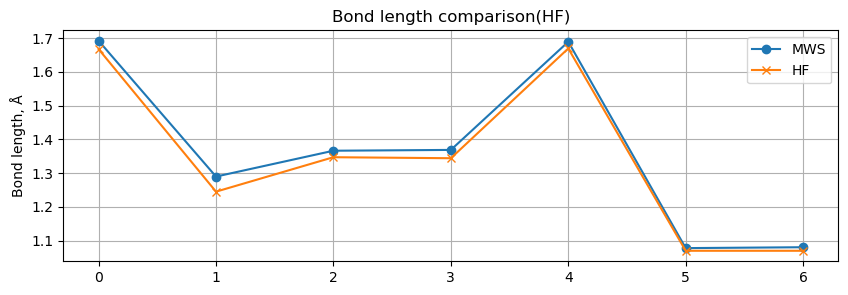

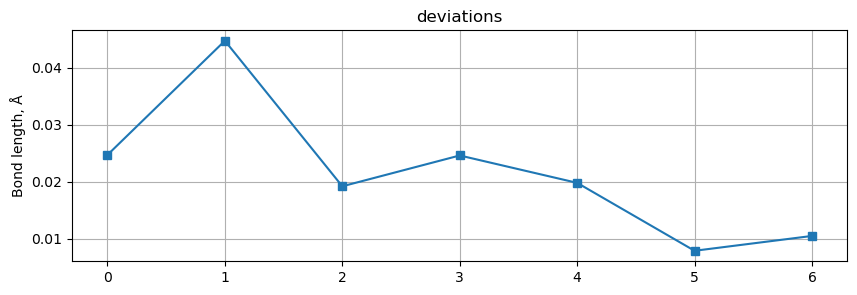

In [27]:
import numpy as np
import matplotlib.pyplot as plt

true_values = [row[0] for row in bond_lengths] 
measured_values = [row[1] for row in bond_lengths]
deviations = abs(np.array(measured_values) - np.array(true_values))

plt.figure(figsize=(10, 3))
plt.plot(true_values, label='MWS', marker='o')
plt.plot(measured_values, label='HF', marker='x')
plt.title('Bond length comparison(HF)')
plt.ylabel('Bond length, Å')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(deviations, label='deviations', marker='s')

plt.title('deviations')
plt.ylabel('Bond length, Å')

plt.grid()
plt.show()

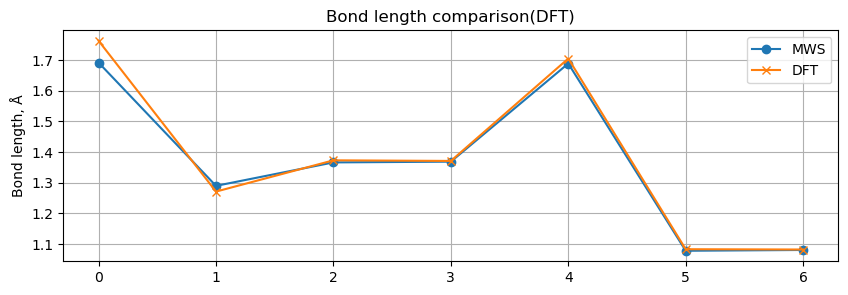

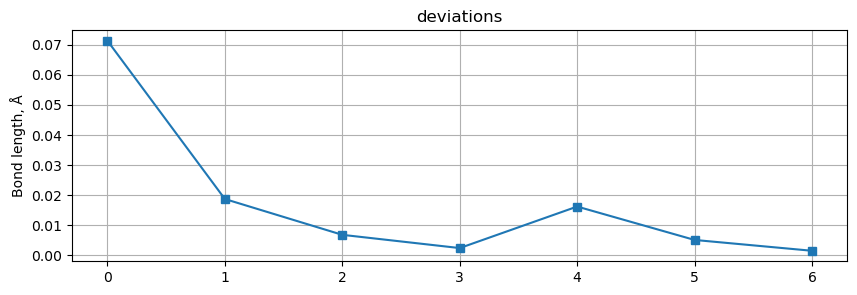

In [29]:
true_values = [row[0] for row in bond_lengths]
measured_values = [row[2] for row in bond_lengths]
deviations = abs(np.array(measured_values) - np.array(true_values))

plt.figure(figsize=(10, 3))
plt.plot(true_values, label='MWS', marker='o')
plt.plot(measured_values, label='DFT', marker='x')
plt.title('Bond length comparison(DFT)')
plt.ylabel('Bond length, Å')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(deviations, label='deviations', marker='s')

plt.title('deviations')
plt.ylabel('Bond length, Å')

plt.grid()
plt.show()

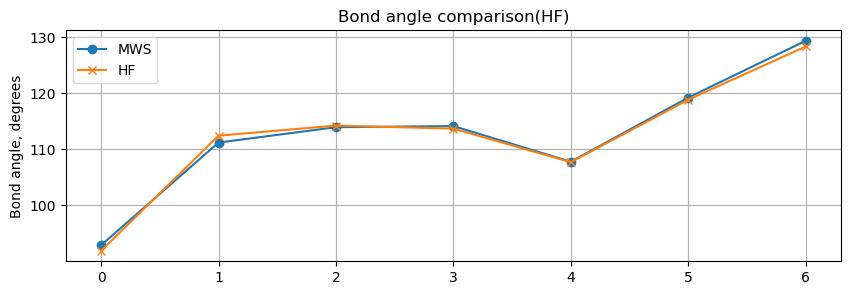

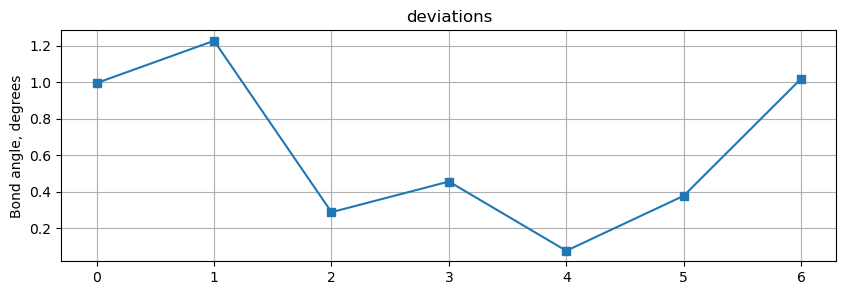

In [31]:
true_values = [row[0] for row in bond_angles]
measured_values = [row[1] for row in bond_angles]
deviations = abs(np.array(measured_values) - np.array(true_values))

plt.figure(figsize=(10, 3))
plt.plot(true_values, label='MWS', marker='o')
plt.plot(measured_values, label='HF', marker='x')
plt.title('Bond angle comparison(HF)')
plt.ylabel('Bond angle, degrees')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(deviations, label='deviations', marker='s')

plt.title('deviations')
plt.ylabel('Bond angle, degrees')

plt.grid()
plt.show()

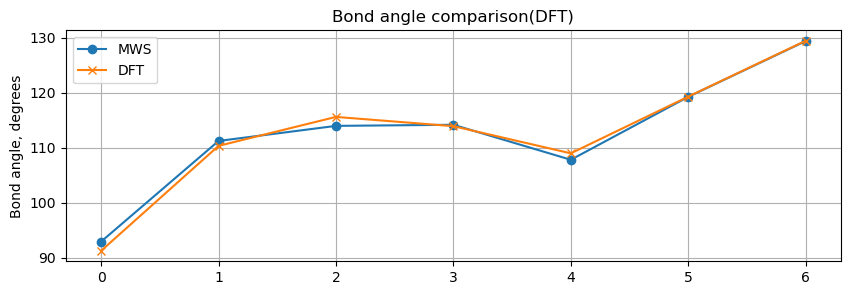

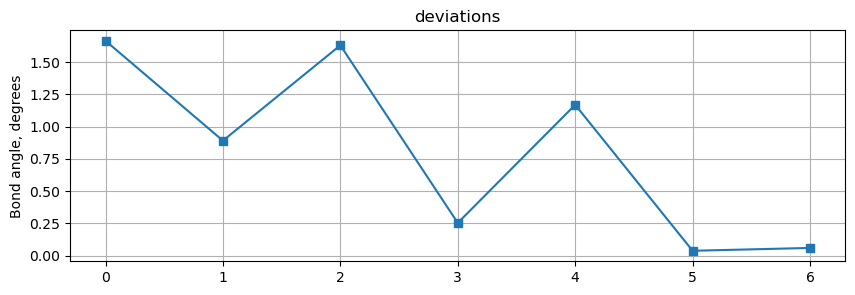

In [33]:
true_values = [row[0] for row in bond_angles]
measured_values = [row[2] for row in bond_angles]
deviations = abs(np.array(measured_values) - np.array(true_values))

plt.figure(figsize=(10, 3))
plt.plot(true_values, label='MWS', marker='o')
plt.plot(measured_values, label='DFT', marker='x')
plt.title('Bond angle comparison(DFT)')
plt.ylabel('Bond angle, degrees')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(deviations, label='deviations', marker='s')

plt.title('deviations')
plt.ylabel('Bond angle, degrees')

plt.grid()
plt.show()